# DeePC Experiment with L1 Regularization on Cartpole

## Create Simulation Environment

In [83]:
from CartpoleModel import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete
from Controller import *

%matplotlib inline

Ts = 0.2
params = np.ones(4)

cartpole = Cartpole(params)

sim = CartpoleSimulator(cartpole, Ts)

Xeq = np.zeros((4,1))
Xeq[1,0] = np.pi

Xeq

array([[0.        ],
       [3.14159265],
       [0.        ],
       [0.        ]])

## LQR Controller to stabilize unstable fixed point

In [84]:
A, B = cartpole.LinearisedDynamics()
C = np.eye(4)
D = np.zeros((4,1))

(Ad, Bd, *s) = cont2discrete((A,B,C,D), Ts, method='bilinear')

ctrl1 = Controller(Ad, Bd, params)

Q = np.array([[20, 0, 0, 0],
              [0, 20, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

R = np.eye(1)*5

K = ctrl1.K_LQR(Q, R)

## Trajectory 1: LQR

In [85]:
X0 = Xeq + np.array([[0],
                     [-0.2],
                     [0],
                     [0]])

full_state = np.squeeze(X0)

timesteps = 200
traj_LQR1 = np.zeros((4, timesteps))
trajU_LQR1 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]
    u_ctrl = np.squeeze(K@(fs-Xeq))
    u_ctrl = np.clip(u_ctrl, -100, 100) 

    full_state = sim.step(full_state, u_ctrl)
    traj_LQR1[:, i] = full_state
    trajU_LQR1[:, i] = u_ctrl

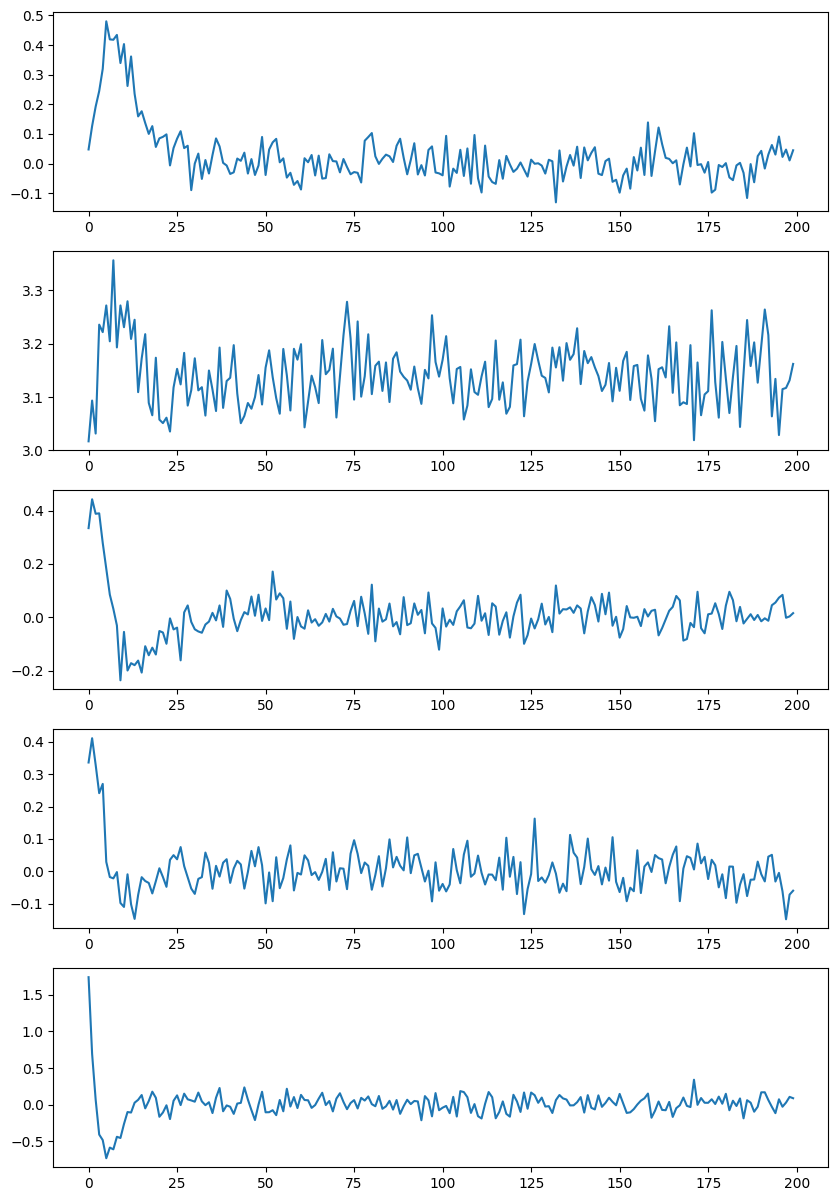

In [4]:
traj_LQR1 += np.random.normal(0, 0.05, traj_LQR1.shape)
trajU_LQR1 += np.random.normal(0, 0.1, trajU_LQR1.shape)

fig, axs = plt.subplots(5,1, figsize=(10, 15))
axs[0].plot(traj_LQR1[0, :])
axs[1].plot(traj_LQR1[1, :])
axs[2].plot(traj_LQR1[2, :])
axs[3].plot(traj_LQR1[3, :])
axs[4].plot(trajU_LQR1[0, :])

## Trajectory 2: LQR

In [5]:
Q = np.array([[30, 0, 0, 0],
              [0, 30, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

R = np.eye(1)

K = ctrl1.K_LQR(Q, R)

In [6]:
X0 = Xeq + np.array([[-2],
                     [0],
                     [0],
                     [0]])

full_state = np.squeeze(X0)

timesteps = 200
traj_LQR2 = np.zeros((4, timesteps))
trajU_LQR2 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]
    u_ctrl = np.squeeze(K@(fs-Xeq))
    u_ctrl = np.clip(u_ctrl, -100, 100) 

    full_state = sim.step(full_state, u_ctrl)
    traj_LQR2[:, i] = full_state
    trajU_LQR2[:, i] = u_ctrl

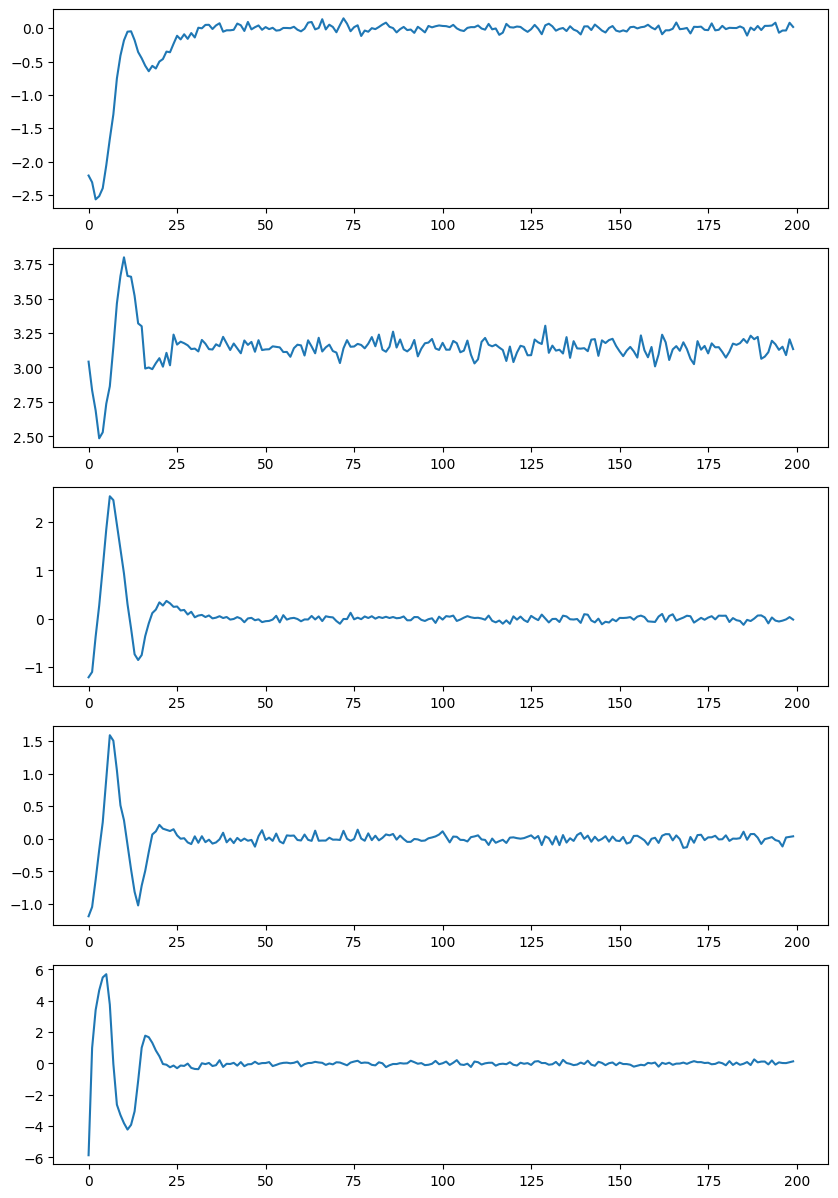

In [7]:
traj_LQR2 += np.random.normal(0, 0.05, traj_LQR2.shape)
trajU_LQR2 += np.random.normal(0, 0.1, trajU_LQR2.shape)

fig, axs = plt.subplots(5,1, figsize=(10, 15))
axs[0].plot(traj_LQR2[0, :])
axs[1].plot(traj_LQR2[1, :])
axs[2].plot(traj_LQR2[2, :])
axs[3].plot(traj_LQR2[3, :])
axs[4].plot(trajU_LQR2[0, :])

## Trajectory 3: LQR

In [8]:
Q = np.array([[100, 0, 0, 0],
              [0, 100, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

R = np.eye(1)

K = ctrl1.K_LQR(Q, R)

In [9]:
X0 = Xeq + np.array([[0],
                     [-0.5],
                     [0],
                     [0]])

full_state = np.squeeze(X0)

timesteps = 200
traj_LQR3 = np.zeros((4, timesteps))
trajU_LQR3 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]
    u_ctrl = np.squeeze(K@(fs-Xeq))
    u_ctrl = np.clip(u_ctrl, -100, 100) 

    full_state = sim.step(full_state, u_ctrl)
    traj_LQR3[:, i] = full_state
    trajU_LQR3[:, i] = u_ctrl

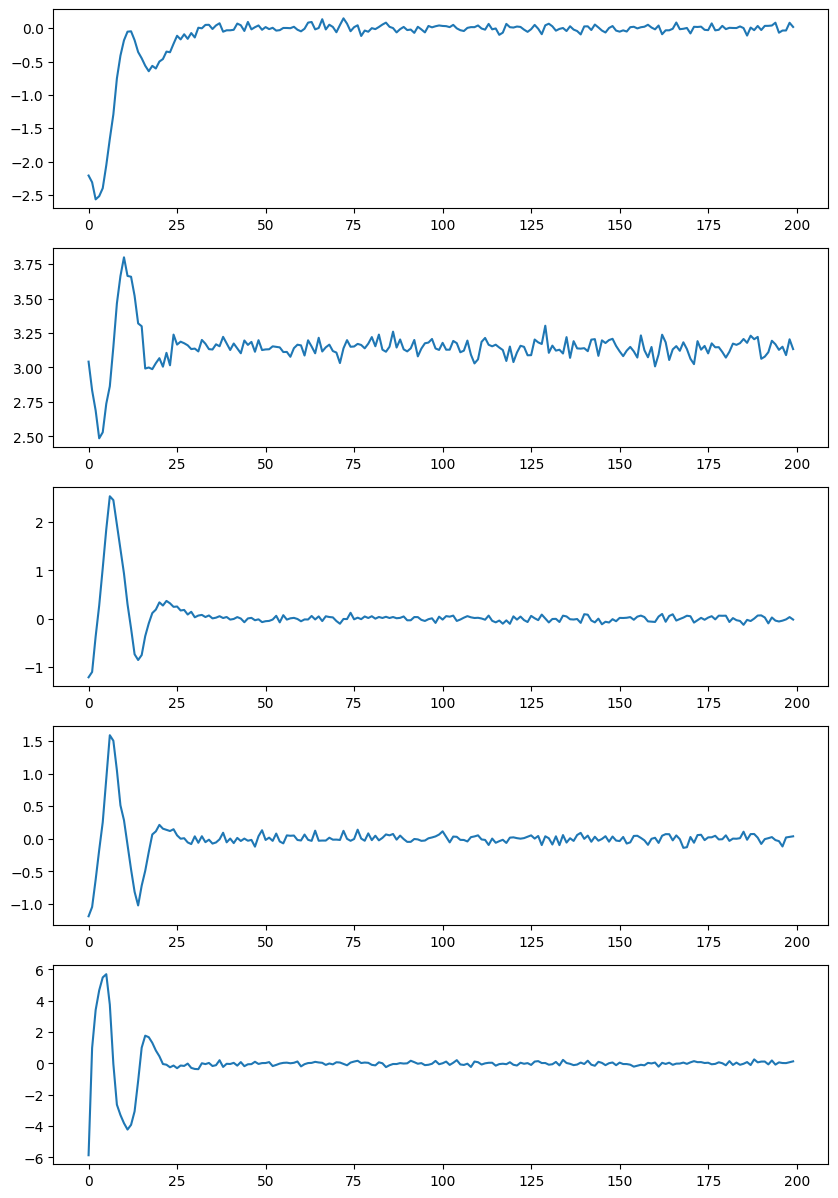

In [10]:
traj_LQR3 += np.random.normal(0, 0.05, traj_LQR3.shape)
trajU_LQR3 += np.random.normal(0, 0.1, trajU_LQR3.shape)

fig, axs = plt.subplots(5,1, figsize=(10, 15))
axs[0].plot(traj_LQR2[0, :])
axs[1].plot(traj_LQR2[1, :])
axs[2].plot(traj_LQR2[2, :])
axs[3].plot(traj_LQR2[3, :])
axs[4].plot(trajU_LQR2[0, :])

## Swing Up using Energy based Control

## Trajectory 4: Swing up

In [11]:
Q = np.array([[100, 0, 0, 0],
              [0, 100, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

R = np.eye(1)

K = ctrl1.K_LQR(Q, R)

kE = 0.6
kP = 0
kD = 0

In [12]:
X0 = Xeq + np.array([[0],
                     [-np.pi-0.01],
                     [0],
                     [0]])

full_state = np.squeeze(X0)

timesteps = 200
traj_Swing1 = np.zeros((4, timesteps))
trajU_Swing1 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]

    if(np.absolute(full_state[1] - np.pi) < 0.4 and np.absolute(full_state[0]) < 1):
        u_ctrl = np.squeeze(K@(fs-Xeq))
    else:  
        u_ctrl = ctrl1.SwingUp(kE, kP, kD, fs)


    full_state = sim.step(full_state, u_ctrl)
    traj_Swing1[:, i] = full_state
    trajU_Swing1[:, i] = u_ctrl

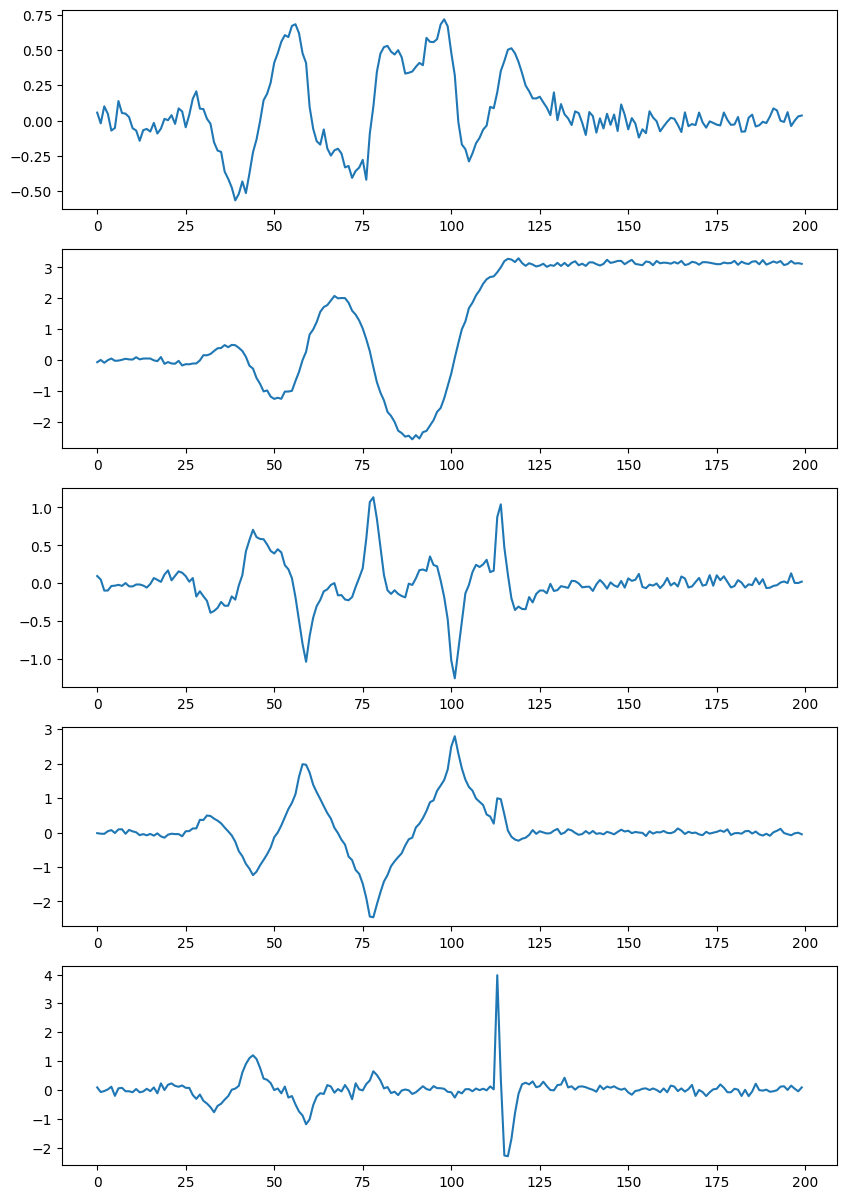

In [13]:
traj_Swing1 += np.random.normal(0, 0.05, traj_Swing1.shape)
trajU_Swing1 += np.random.normal(0, 0.1, trajU_Swing1.shape)

fig, axs = plt.subplots(5,1, figsize=(10, 15))
axs[0].plot(traj_Swing1[0, :])
axs[1].plot(traj_Swing1[1, :])
axs[2].plot(traj_Swing1[2, :])
axs[3].plot(traj_Swing1[3, :])
axs[4].plot(trajU_Swing1[0, :])

## Trajectory 5: Swing up

In [14]:
Q = np.array([[100, 0, 0, 0],
              [0, 100, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

R = np.eye(1)

K = ctrl1.K_LQR(Q, R)

kE = 0.8
kP = 0.05
kD = 0.0001

In [15]:
X0 = Xeq + np.array([[0],
                     [-np.pi-0.1],
                     [0],
                     [0]])

full_state = np.squeeze(X0)

timesteps = 200
traj_Swing2 = np.zeros((4, timesteps))
trajU_Swing2 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]

    if(np.absolute(full_state[1] - np.pi) < 0.2 and np.absolute(full_state[0]) < 1):
        u_ctrl = np.squeeze(K@(fs-Xeq))
    else:  
        u_ctrl = ctrl1.SwingUp(kE, kP, kD, fs)


    full_state = sim.step(full_state, u_ctrl)
    traj_Swing2[:, i] = full_state
    trajU_Swing2[:, i] = u_ctrl

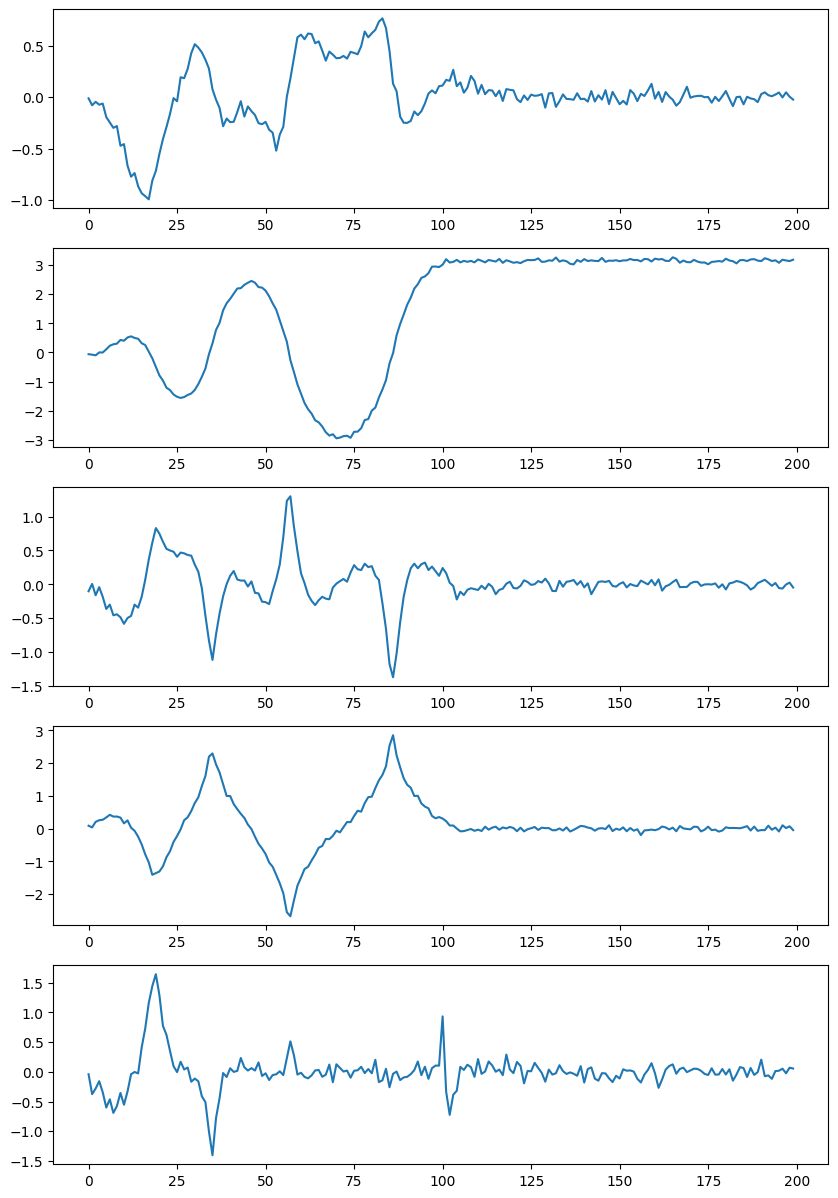

In [16]:
traj_Swing2 += np.random.normal(0, 0.05, traj_Swing2.shape)
trajU_Swing2 += np.random.normal(0, 0.1, trajU_Swing2.shape)

fig, axs = plt.subplots(5,1, figsize=(10, 15))
axs[0].plot(traj_Swing2[0, :])
axs[1].plot(traj_Swing2[1, :])
axs[2].plot(traj_Swing2[2, :])
axs[3].plot(traj_Swing2[3, :])
axs[4].plot(trajU_Swing2[0, :])

## Trajectory 6: Swing Up

In [17]:
Q = np.array([[100, 0, 0, 0],
              [0, 100, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

R = np.eye(1)

K = ctrl1.K_LQR(Q, R)

kE = 0.8
kP = 0.05
kD = 0

In [18]:
X0 = Xeq + np.array([[0],
                     [-np.pi-0.1],
                     [0],
                     [0]])

full_state = np.squeeze(X0)

timesteps = 200
traj_Swing3 = np.zeros((4, timesteps))
trajU_Swing3 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]

    if(np.absolute(full_state[1] - np.pi) < 0.2 and np.absolute(full_state[0]) < 1):
        u_ctrl = np.squeeze(K@(fs-Xeq))
    else:  
        u_ctrl = ctrl1.SwingUp(kE, kP, kD, fs)


    full_state = sim.step(full_state, u_ctrl)
    traj_Swing3[:, i] = full_state
    trajU_Swing3[:, i] = u_ctrl

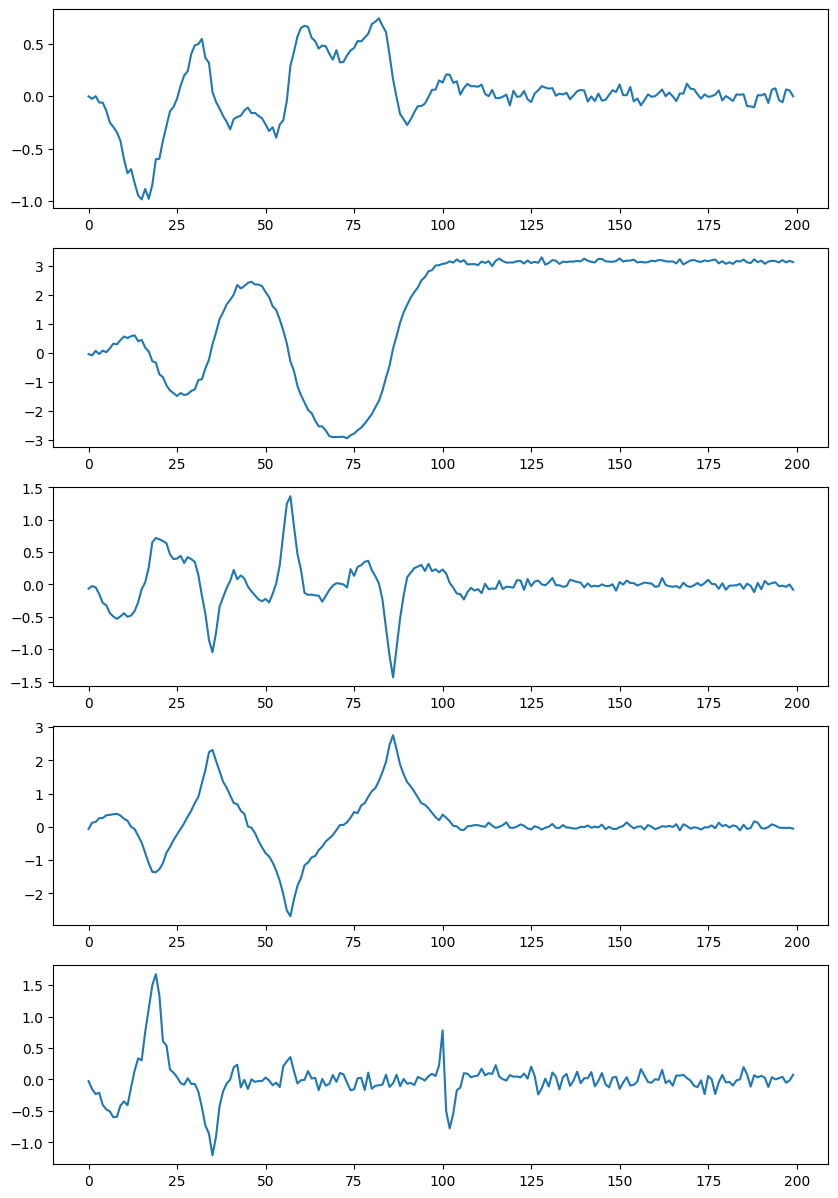

In [19]:
traj_Swing3 += np.random.normal(0, 0.05, traj_Swing3.shape)
trajU_Swing3 += np.random.normal(0, 0.1, trajU_Swing3.shape)

fig, axs = plt.subplots(5,1, figsize=(10, 15))
axs[0].plot(traj_Swing3[0, :])
axs[1].plot(traj_Swing3[1, :])
axs[2].plot(traj_Swing3[2, :])
axs[3].plot(traj_Swing3[3, :])
axs[4].plot(trajU_Swing3[0, :])

## Random Inputs

In [20]:
X0 = Xeq + np.array([[0],
                     [-np.pi],
                     [0],
                     [0]])

full_state = np.squeeze(X0)

timesteps = 200
traj_Random1 = np.zeros((4, timesteps))
trajU_Random1 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]
    u_ctrl = np.random.normal(0, 1)

    full_state = sim.step(full_state, u_ctrl)
    traj_Random1[:, i] = full_state
    trajU_Random1[:, i] = u_ctrl

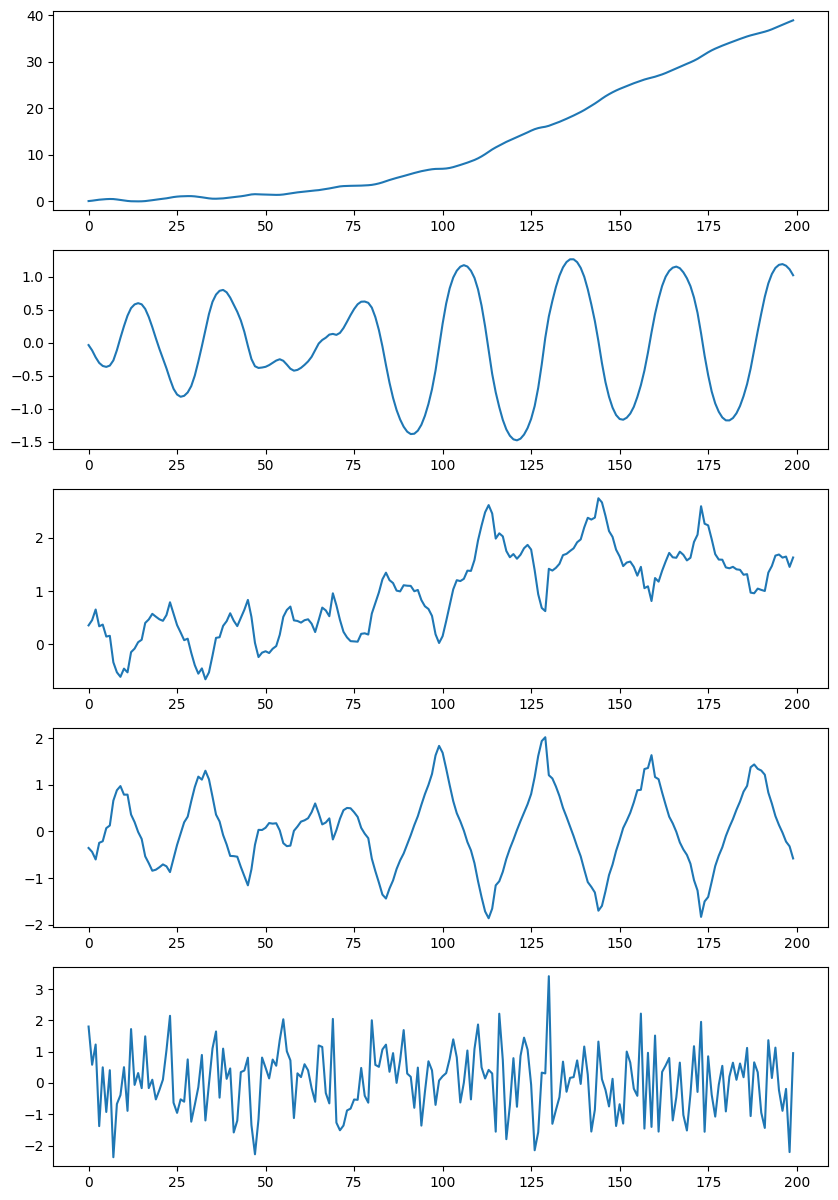

In [21]:
fig, axs = plt.subplots(5,1, figsize=(10, 15))
axs[0].plot(traj_Random1[0, :])
axs[1].plot(traj_Random1[1, :])
axs[2].plot(traj_Random1[2, :])
axs[3].plot(traj_Random1[3, :])
axs[4].plot(trajU_Random1[0, :])

## Constructing Hankel Matrices from the Trajectories

In [70]:
from DeePC_utils import *
from DeePC import *

Tini = 30
L = 100
nx = 4
nu = 1

u_lim = (-5, 5)

Hx1 = createHankel(traj_LQR1, L, 200)
Hx2 = createHankel(traj_LQR2, L, 200)
Hx3 = createHankel(traj_LQR3, L, 200)
Hx4 = createHankel(traj_Swing1, L, 200)
Hx5 = createHankel(traj_Swing2, L, 200)
Hx6 = createHankel(traj_Swing3, L, 200)
Hx7 = createHankel(traj_Random1, L, 200)


Hu1 = createHankel(trajU_LQR1, L, 200)
Hu2 = createHankel(trajU_LQR2, L, 200)
Hu3 = createHankel(trajU_LQR3, L, 200)
Hu4 = createHankel(trajU_Swing1, L, 200)
Hu5 = createHankel(trajU_Swing2, L, 200)
Hu6 = createHankel(trajU_Swing3, L, 200)
Hu7 = createHankel(trajU_Random1, L, 200)

Y = mergedHankel((Hx1, Hx2, Hx3, Hx4, Hx5, Hx6, Hx7))
U = mergedHankel((Hu1, Hu2, Hu3, Hu4, Hu5, Hu6, Hu7))

In [71]:
Yp, Yf = splitHankel(Y, Tini, L, nx)
Up, Uf = splitHankel(U, Tini, L, nu)

## Reference Generation

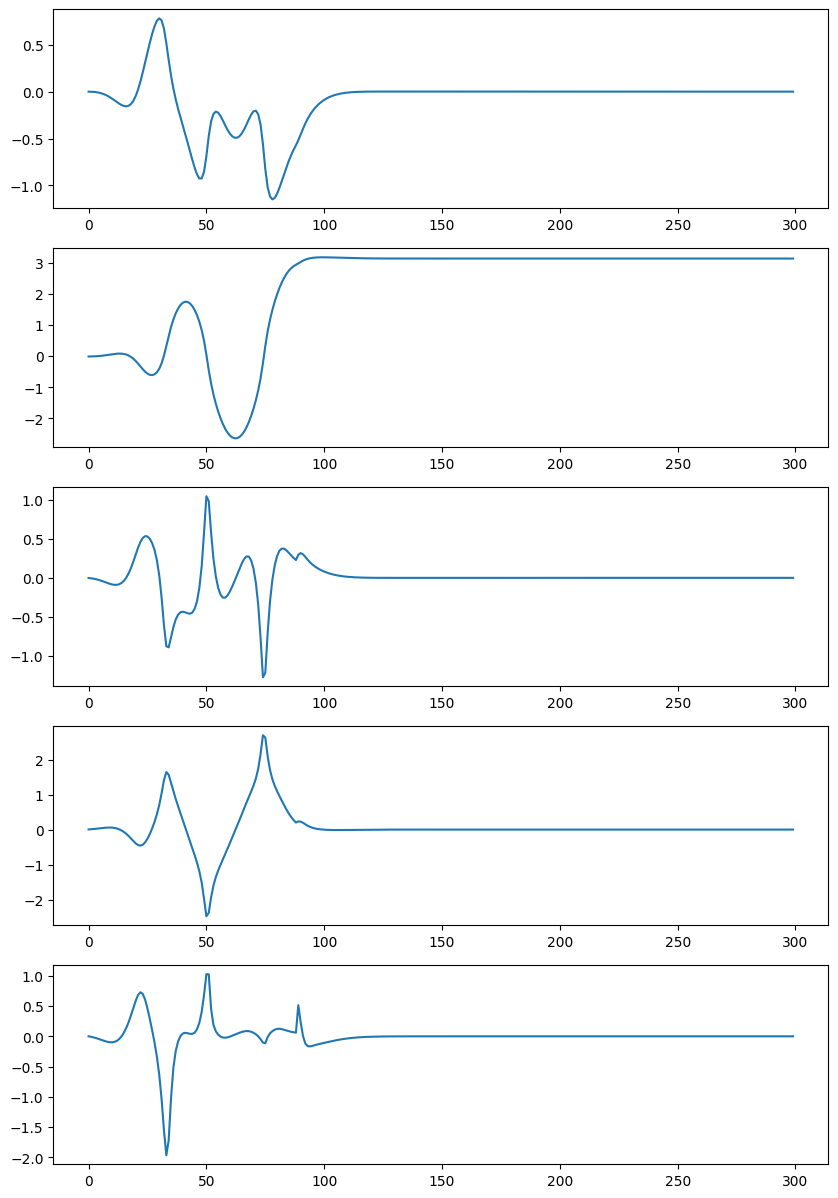

In [72]:
Q = np.array([[100, 0, 0, 0],
              [0, 100, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

R = np.eye(1)

K = ctrl1.K_LQR(Q, R)

kE = 0.9
kP = 0.1
kD = 0.001

X0 = Xeq + np.array([[0],
                     [-np.pi-0.01],
                     [0],
                     [0]])

full_state = np.squeeze(X0)

timesteps_exp = 300
traj_ref = np.zeros((4, timesteps_exp))
trajU_ref = np.zeros((1, timesteps_exp))

for i in range(timesteps_exp):

    fs = full_state[:, np.newaxis]

    if(np.absolute(full_state[1] - np.pi) < 0.2 and np.absolute(full_state[0]) < 1):
        u_ctrl = np.squeeze(K@(fs-Xeq))
    else:  
        u_ctrl = ctrl1.SwingUp(kE, kP, kD, fs)


    full_state = sim.step(full_state, u_ctrl)
    traj_ref[:, i] = full_state
    trajU_ref[:, i] = u_ctrl

fig, axs = plt.subplots(5,1, figsize=(10, 15))
axs[0].plot(traj_ref[0, :])
axs[1].plot(traj_ref[1, :])
axs[2].plot(traj_ref[2, :])
axs[3].plot(traj_ref[3, :])
axs[4].plot(trajU_ref[0, :])

## Optimization Parameters and Cost Matrices

In [73]:
Q = np.zeros(Yf.shape[0])
Q[::4] = 500
Q[1::4] = 0

R = np.ones(Uf.shape[0])*0.1
lamda_g = 1e3
lamda_s = 5

deepc = DeePC_Controller(Yp, Yf, Up, Uf)

prob, y_ini, u_ini, ref, g, uf = deepc.OneNormDeePC(Q, R, lamda_g, lamda_s, u_lim)

In [78]:
import numpy.matlib as mat
X0 = np.array([[0.5],
                [0.0],
                [0.0],
                [0.0]])

target = np.array([[0],
                   [0],
                   [0],
                   [0]])

reference = ReshapeTraj(mat.repmat(target, 1, L-Tini))
timesteps = 200
# reference[:20] = np.zeros((20,1))

full_state = np.squeeze(X0)

traj = np.zeros((4, timesteps))
trajU = np.zeros((1, timesteps))
traj_Tini = np.zeros((4, Tini)) + X0
trajU_Tini = np.zeros((1, Tini))

G = np.zeros((Yp.shape[1], timesteps))

In [82]:
Y.shape

(400, 707)

## DeePC Test

In [79]:
for i in range(200):

    # fs = full_state[:, np.newaxis]
    # reference = np.linspace(fs, target, L-Tini)

    y_ini.value = ReshapeTraj(traj_Tini)
    u_ini.value = ReshapeTraj(trajU_Tini)

    ref.value = reference
    # ref.value = giveReference(traj_ref, i, L-Tini)

    prob.solve(solver=cv.OSQP, warm_start=True)

    u_ctrl = uf.value[0, :]

    full_state = sim.step(full_state, np.squeeze(u_ctrl))
    
    traj[:, i] = full_state
    trajU[:, i] = u_ctrl

    G[:, i] = np.squeeze(g.value)

    traj_Tini = TimeShift(traj_Tini, full_state[:, np.newaxis])
    trajU_Tini = TimeShift(trajU_Tini, u_ctrl[:, np.newaxis])

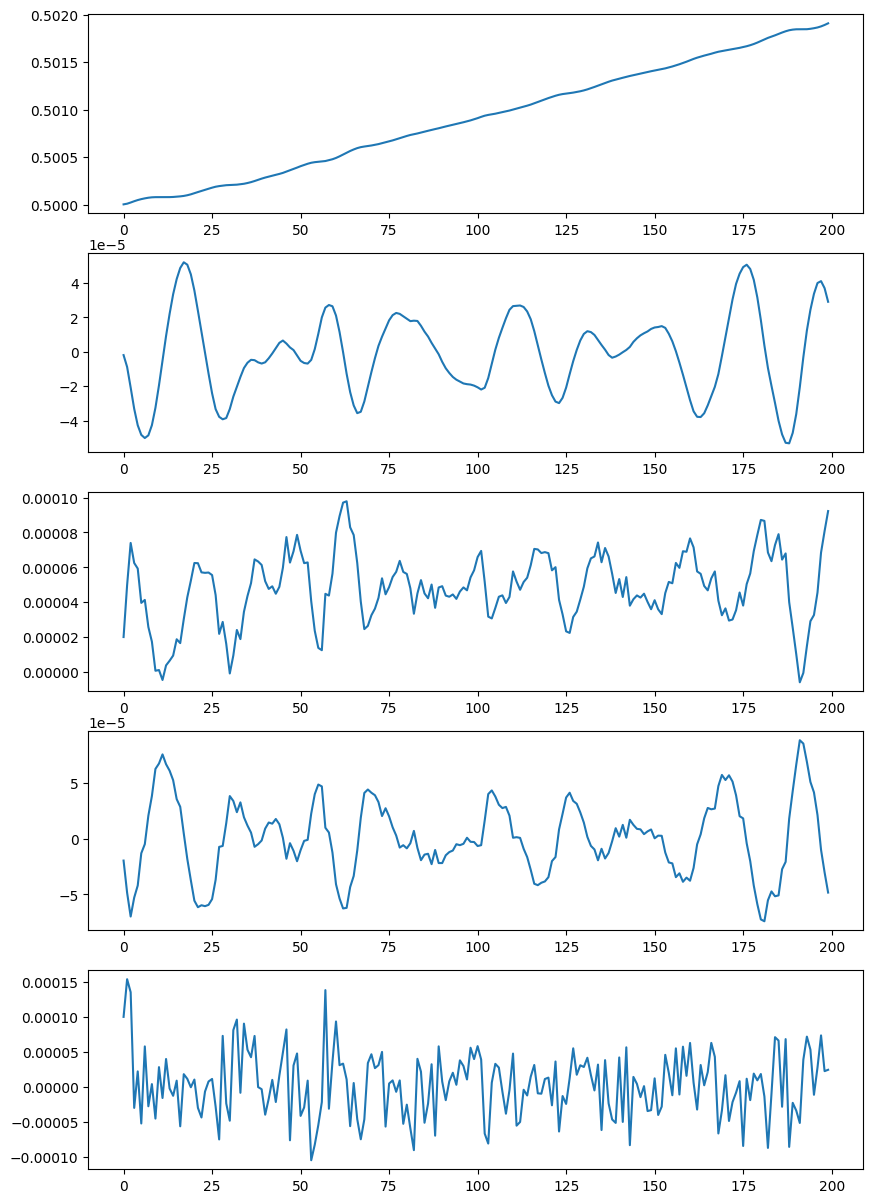

In [80]:
fig, axs = plt.subplots(5,1, figsize=(10, 15))
axs[0].plot(traj[0, :])
axs[1].plot(traj[1, :])
axs[2].plot(traj[2, :])
axs[3].plot(traj[3, :])
axs[4].plot(trajU[0, :])

<Axes: >

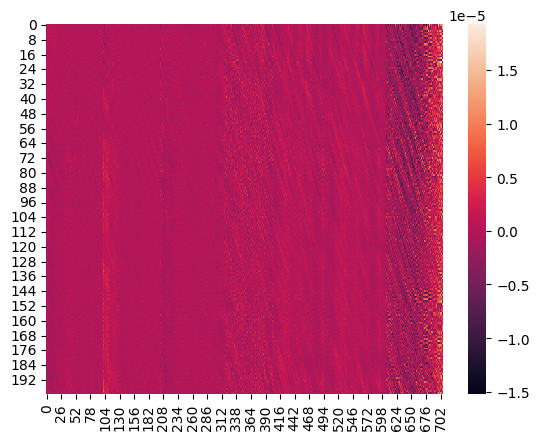

In [81]:
import seaborn as sns
sns.heatmap(G.T)